Non-Stacked


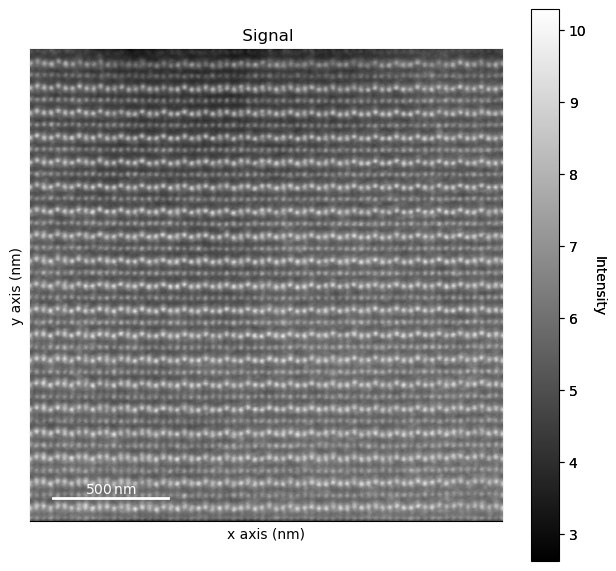

In [1]:
import skimage
import matplotlib.pyplot as plt
import hyperspy.api as hs
import sys
sys.path.append('../..')
import util.crop

stack_num = 0 # The index of stacked image

# Change the name of s_load to load different plots.
# Note that some datasets are in stacks and their data will be 3-dimension,
# where the first dimention is the index of a single stacked image. We want to
# look at one image each of the time, so for those stacked images, please change
# stack_num to view different images.

# Load one file at a time.
s_load = hs.load('../../data/images/Jaume LFO/HAADF_Buena.dm3')

if len(s_load.data.shape) == 2: # Non-stacked
    print("Non-Stacked")
    s = s_load
else: # Stacked, where s_load.data.shape = 3
    print("Stacked")
    s = s_load.inav[stack_num]

# Plot the image in pixels. We can plot in nanometers by simply doing s.plot().
import copy
s_copy = copy.deepcopy(s)
for ax in s_copy.axes_manager.signal_axes:
    ax.scale = 1.0
    ax.offset = 0.0

plt.close()
s_copy.plot()

In [2]:
import scipy.signal
import numpy as np

left_bound = 100 # TUNE THIS
right_bound = 2048-100 # TUNE THIS
start_pixel = 100 # TUNE THIS
end_pixel = 2048-100 # TUNE THIS
crop = util.crop.Crop(s, left_bound, right_bound, start_pixel, end_pixel)

crop.build_grid_dict()
crop.get_atom_positions()
# crop.refine_atom_positions()
positions_array = np.array(list(crop.atom_positions.values()))

In [ ]:
crop.get_nn_intensities()
crop.get_nn_displacements()
crop.get_atom_types()